In [1]:
# Required Packages
import pandas as pd
import missingno as msno
import numpy as np
import copy

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import copy

# Plots

import seaborn as sns
import matplotlib.pyplot as plt

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Movie Recommendation System (Preprocessing)

## Initial Modifications

In this study, we are using a Data Source from Kaggle.com ([link to Data](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)). This dataset contains several NaN values and some of the values need to use standard forms.

#### Table of contents
* [Initial Modifications](#Initial-Modifications)
    * [Loading the Data](#Loading-the-Data)
    * [Modifying the Column Names](#Modifying-the-Column-Names)
    * [Removing Duplicates](#Removing-Duplicates)
    * [Sorting the columns based on column names](#Sorting-the-columns-based-on-column-names)
    * [Removing unnessary columns](#Removing-unnessary-columns)
    * [Removing Duplicates](#Removing-Duplicates)
* [Missing values](Missing-values)
    * [Column 'director_name'](#Column-'director_name')
    * [Column 'budget'](#Column-'budget')
    * [Column 'color'](#Column-'color')
    * [Column 'language'](#Column-'language')
    * [Column 'duration'](#Column-'duration')
    * [Column 'country'](#Column-'country')
    * [Column 'content_rating'](#Column-'content_rating')
    * [Columns contain 'likes'](#Columns-contain 'likes')
    * [Column 'Gross'](#Column-'Gross')

### Loading the Data

In [2]:
Data = pd.read_csv('Data/movie_metadata.csv')
Data.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

### Modifying the Column Names

In [3]:
Temp = Data.columns.tolist()
Temp = [x.title() for x in Temp]
Temp = [x.replace('Imdb','IMDB') for x in Temp]
Data.columns = Temp
del Temp
Data.head().style.hide_index()

### Sorting the columns based on column names

In [4]:
Data = Data.reindex(columns=sorted(Data.columns))
Data.head().style.hide_index()

### Removing unnessary columns

Note that

In [5]:
print(Data.columns.tolist())

['Actor_1_Facebook_Likes', 'Actor_1_Name', 'Actor_2_Facebook_Likes', 'Actor_2_Name', 'Actor_3_Facebook_Likes', 'Actor_3_Name', 'Aspect_Ratio', 'Budget', 'Cast_Total_Facebook_Likes', 'Color', 'Content_Rating', 'Country', 'Director_Facebook_Likes', 'Director_Name', 'Duration', 'Facenumber_In_Poster', 'Genres', 'Gross', 'IMDB_Score', 'Language', 'Movie_Facebook_Likes', 'Movie_IMDB_Link', 'Movie_Title', 'Num_Critic_For_Reviews', 'Num_User_For_Reviews', 'Num_Voted_Users', 'Plot_Keywords', 'Title_Year']


In [6]:
Drop_column_list = ['Facenumber_In_Poster', 'Movie_IMDB_Link', 'Aspect_Ratio']
Data[Drop_column_list].head()

Facenumber_In_Poster                                    Movie_IMDB_Link  \
0                   0.0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...   
1                   0.0  http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
2                   1.0  http://www.imdb.com/title/tt2379713/?ref_=fn_t...   
3                   0.0  http://www.imdb.com/title/tt1345836/?ref_=fn_t...   
4                   0.0  http://www.imdb.com/title/tt5289954/?ref_=fn_t...   

   Aspect_Ratio  
0          1.78  
1          2.35  
2          2.35  
3          2.35  
4           NaN

The following three columns are unnecessary for our study. Thus, we are going to remove these columns.
* `Facenumber_In_Poster`
* `Movie_IMDB_Link`
* `Aspect_Ratioo`

Thus, these columns are dropped from our data

In [7]:
Data.drop(Drop_column_list, axis=1, inplace=True)
del Drop_column_list

### Removing Duplicates

First of all, note that

In [8]:
Data_Duplicated = Data[Data.Movie_Title.duplicated(keep='last')]
pd.DataFrame(Data_Duplicated.Movie_Title)

Movie_Title
6                 Spider-Man 3 
17                The Avengers 
25                   King Kong 
30                     Skyfall 
33         Alice in Wonderland 
...                         ...
3800  Saving Grace             
3887  Night of the Living Dead 
3984            The Full Monty 
4223               The Calling 
4949         A Dog's Breakfast 

[126 rows x 1 columns]

These values are duplicated!

In [9]:
print("There are %i unique rows from %i."% (len(Data.Movie_Title.unique()), len(Data.Movie_Title)))
number_of_duplicated=len(Data.Movie_Title)-len(Data.Movie_Title.unique())
print("There are %i duplicated rows."% number_of_duplicated)
del number_of_duplicated, Data_Duplicated

There are 4917 unique rows from 5043.
There are 126 duplicated rows.


Removing the duplicated movies.

In [10]:
Data.drop_duplicates(subset="Movie_Title", inplace=True)

To get a better understanding of our data, we can use the following plot.

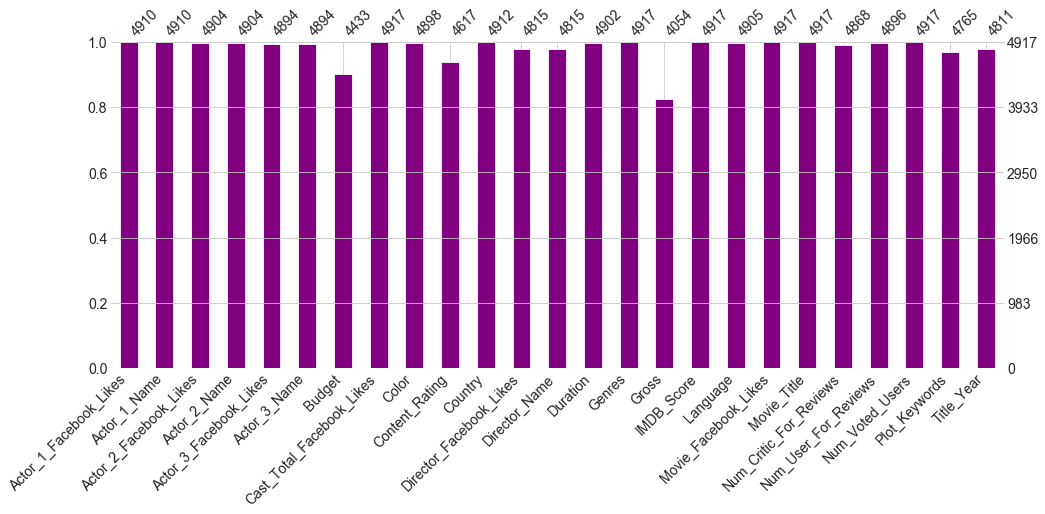

In [11]:
_ = msno.bar(Data,  figsize=(16,6), fontsize=14, log=False, color="purple")

## Missing values

### Column 'Director_Name'

We can just simply drop rows without `director_name`.

In [12]:
Data.drop(Data[Data.Director_Name.isna()].index, inplace=True)

### Column 'Budget'

Replacing missing `budget` values with the mean value

In [13]:
imp= SimpleImputer(missing_values=np.nan, strategy='mean')
temp=imp.fit_transform(Data['Budget'].values.reshape(-1, 1))
Data['Budget']=temp
del temp

### Column 'Color'

For moviess `color`, we have

In [14]:
Ind=Data.Color.isna()
Data.loc[Ind, ['Movie_Title','Title_Year','Color']].sort_values(by='Title_Year', ascending=True).head()

Movie_Title  Title_Year Color
4846                Midnight Cabaret       1990.0   NaN
2753               Shinjuku Incident       2009.0   NaN
1948                       Dear John       2010.0   NaN
3638  Snow Flower and the Secret Fan       2011.0   NaN
5020                      The Ridges       2011.0   NaN

We can assume that these movies are all in color since the earliest movie on this list is 1990. Thus,

In [15]:
Data.Color.fillna('Color', inplace=True)

In [16]:
Data.loc[Ind, ['Movie_Title','Title_Year','Color']].sort_values(by='Title_Year', ascending=True).head()

Movie_Title  Title_Year  Color
4846                Midnight Cabaret       1990.0  Color
2753               Shinjuku Incident       2009.0  Color
1948                       Dear John       2010.0  Color
3638  Snow Flower and the Secret Fan       2011.0  Color
5020                      The Ridges       2011.0  Color

### Column 'Language'

As for the `Language`, we have,

In [17]:
Data.Language.unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'German', 'Aramaic', 'Italian', 'Dutch',
       'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish', 'Korean',
       'Thai', 'Bosnian', 'None', 'Hungarian', 'Portuguese', 'Icelandic',
       'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada', 'Zulu',
       'Panjabi', 'Polish', 'Tamil', 'Dzongkha', 'Vietnamese',
       'Indonesian', 'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek',
       'Swahili'], dtype=object)

We can see undesired values usch as *NaN* and *None*. First, let's deal with *None*. We have

In [18]:
Data.loc[Data.Language == 'None', 'Country']

2895    Canada
3931       USA
Name: Country, dtype: object

We can assume that these movies have been produced in English.

In [19]:
Data.loc[Data.Language.isna(), 'Country']

4       NaN
279     NaN
3086    USA
3539    USA
3869    USA
4110    USA
4409    USA
4630    USA
4810    USA
4885    USA
4958    USA
Name: Country, dtype: object

Since most movies are from the USA, we can assume that these movies have been produced in English. Therefore,

In [20]:
Data.Language.fillna('English', inplace=True)
Data.Language.replace('None', 'English', inplace=True)

### Column 'Duration'

We can see that `Duration` of some movies are missing.

In [21]:
Data.loc[Data.Duration.isna(), ['Movie_Title','Duration']].head()

Movie_Title  Duration
4     Star Wars: Episode VII - The Force Awakens    ...       NaN
199      Harry Potter and the Deathly Hallows: Part II        NaN
206       Harry Potter and the Deathly Hallows: Part I        NaN
1510                               Black Water Transit        NaN
3815                              Should've Been Romeo        NaN

There is nothing can be done regarding these movies and we are going to simply drop them.

In [22]:
Data.drop(Data.loc[Data.Duration.isna()].index, inplace=True)

In [23]:
Data.loc[Data.Title_Year.isna(), ['Movie_Title','Title_Year']]

Movie_Title  Title_Year
279                     10,000 B.C.                      NaN
2765               Towering Inferno                      NaN
2870  Del 1 - Män som hatar kvinnor                      NaN

Drop these data as well.

In [24]:
Data.drop(Data.loc[Data.Title_Year.isna()].index, inplace=True)

### Column 'Country'

As for `Country`, there is only one movie with the country name.

In [25]:
temp=Data.loc[Data.Country.isna(),('Movie_Title','Actor_1_Name','Actor_2_Name','Actor_3_Name','Director_Name','Country')]
temp

Movie_Title  Actor_1_Name Actor_2_Name Actor_3_Name      Director_Name  \
4021  Dawn Patrol   Chris Brochu   Jeff Fahey  Rita Wilson  Daniel Petrie Jr.   

     Country  
4021     NaN

We can search the data for the actor's names and their other movies.

In [26]:
Data.loc[(Data.Actor_1_Name == temp.Actor_1_Name.values[0])|
         (Data.Actor_2_Name == temp.Actor_2_Name.values[0])|
         (Data.Actor_3_Name == temp.Actor_3_Name.values[0]),'Country']
del temp

This movie is made in the USA and we can replace *NaN* with the USA.

In [27]:
Data.Country.fillna('USA', inplace=True)

### Column 'Content_Rating'

For movie `ratings`, note that the ratings used since 1996 are [source](https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system)

| Rated | Description |
|-------|----------------------------------------------------------------------------------------|
| G | General audiences – All ages admitted. |
| PG | Parental guidance suggested – Some material may not be suitable for children. |
| PG-13 | Parents strongly cautioned – Some material may be inappropriate for children under 13. |
| R | Restricted – Under 17 requires accompanying parent or adult guardian. |
| NC-17 | No one 17 and under admitted. |

Thus, an standard list of ratings can be found as

In [28]:
Ratings_Standard = np.array(['G', 'PG', 'PG-13', 'R', 'NC-17'], dtype=object)
Ratings_Standard 

array(['G', 'PG', 'PG-13', 'R', 'NC-17'], dtype=object)

However,

In [29]:
Data.Content_Rating.unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'TV-14', 'Not Rated', 'Unrated',
       'Approved', 'NC-17', 'X', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG'],
      dtype=object)

We need to convert

In [30]:
list(set(Data.Content_Rating.unique().tolist())-set(Ratings_Standard))

[nan,
 'Approved',
 'TV-PG',
 'Passed',
 'Not Rated',
 'GP',
 'X',
 'TV-G',
 'M',
 'TV-14',
 'Unrated']

To the standard form. We can convert these values using the following table.

| Standard Format | Data Format |
|-----------------|--------------------|
| PG | G, TV-G, TV-PG, GP |
| R | M |
| Unrated | NaN,Not Rated |
| Approved | Passed |
| PG-13 | TV-14 |
| NC-17 | X |

In [31]:
Conversation_Map = {'PG':'PG', 'TV-G':'PG', 'GP':'PG','TV-PG':'PG',
                    'PG-13':'PG-13','TV-14':'PG-13',
                    'G':'PG', 'R':'R', 'M':'R',
                    np.nan:'Unrated', 'Unrated':'Unrated', 'Not Rated':'Unrated',
                    'Approved':'Approved', 'Passed':'Approved',
                    'NC-17':'NC-17', 'X':'NC-17'}

In [32]:
Data.content_rating = Data.Content_Rating.map(Conversation_Map)

In [33]:
Data.Content_Rating.unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'TV-14', 'Not Rated', 'Unrated',
       'Approved', 'NC-17', 'X', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG'],
      dtype=object)

As for actors,

In [34]:
Columns=list(Data.columns)
# Actors Column List
Actors_Column_List=list()
for i in range(len(Columns)):
    if (Columns[i].find('Actor') != -1 & Columns[i].find('Likes') == -1):
        Actors_Column_List.append(Columns[i])

In [35]:
Data.loc[Data.Actor_1_Name.isna(), Actors_Column_List]

Actor_1_Name Actor_2_Name Actor_3_Name
4502          NaN          NaN          NaN
4519          NaN          NaN          NaN
4720          NaN          NaN          NaN
4837          NaN          NaN          NaN
4945          NaN          NaN          NaN
4946          NaN          NaN          NaN
4990          NaN          NaN          NaN

Replacing these values with `'None'`.

In [36]:
Data.Actor_1_Name.fillna('None', inplace=True)
Data.Actor_2_Name.fillna('None', inplace=True)
Data.Actor_3_Name.fillna('None', inplace=True)

### Columns contain 'Likes'

* Movie Facebook Likes,
* Director Facebook Likes,
* Actor 1 Facebook Likes, 
* Actor 2 Facebook Likes.
* Actor 3 Facebook Likes,
* Cast Total Facebook Likes,


In [37]:
Columns=list(Data.columns)
# Likes List
Likes_List=list()
# Reviews List
Reviews_List=list()

for i in range(len(Columns)):
    if Columns[i].find('Likes') != -1:
        Likes_List.append(Columns[i])
    if Columns[i].find('Review') != -1:
        Reviews_List.append(Columns[i])
    if Columns[i].find('Score') != -1:
        Reviews_List.append(Columns[i])
    if Columns[i].find('Vote') != -1:
        Reviews_List.append(Columns[i])

In [38]:
pd.DataFrame(Data[Likes_List].isna().sum(), columns=['Number of NaN'])

Number of NaN
Actor_1_Facebook_Likes                 7
Actor_2_Facebook_Likes                10
Actor_3_Facebook_Likes                17
Cast_Total_Facebook_Likes              0
Director_Facebook_Likes                0
Movie_Facebook_Likes                   0

We can replace them with **zero**.

In [39]:
for i in Likes_List:
    Data.loc[:, i].fillna(0, inplace=True)
    
for i in Reviews_List:
    Data.loc[:, i].fillna(0, inplace=True)

del i

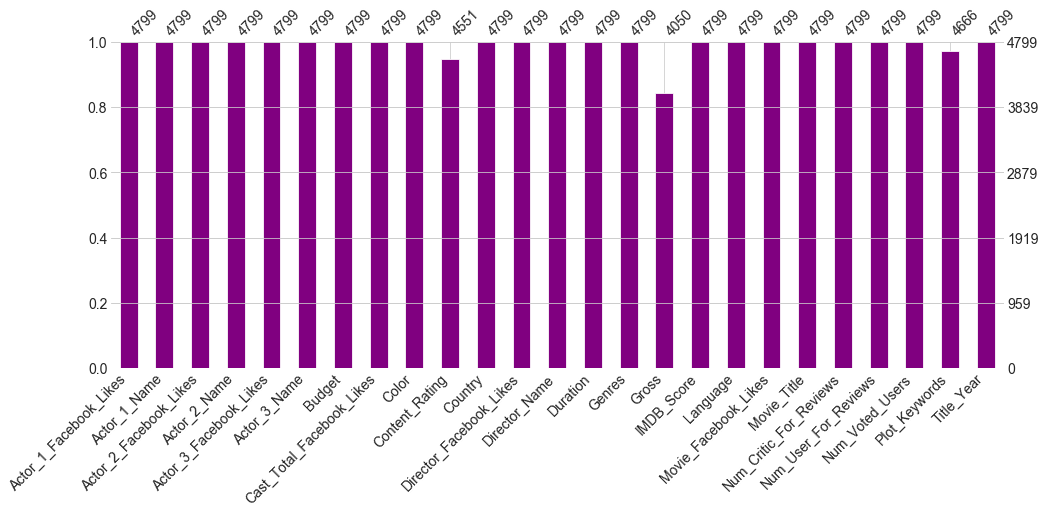

In [40]:
_ = msno.bar(Data,  figsize=(16,6), fontsize=14, log=False, color="purple")

### Column 'Gross'

First, let's look at the correlation plot for our data.

In [41]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    #_ = ax.set_ylim(bottom + 0.5, top - 0.5)

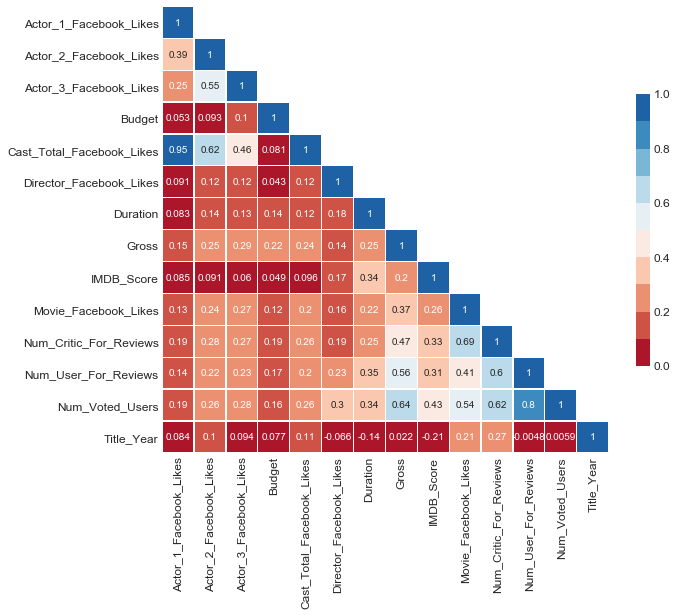

In [42]:
Correlation_Plot (Data,10)

In [43]:
Correlation_Matrix = Data.corr()
gross_most_corr_list=list(Correlation_Matrix.Gross[Correlation_Matrix.Gross > 0.5].index)
gross_most_corr_list.remove('Gross')
gross_most_corr_list

['Num_User_For_Reviews', 'Num_Voted_Users']

It can be seen that `'Num_User_For_Reviews'` and `'Num_Voted_Users'` are highly correlated with `'Gross'`.

In [44]:
gross_null = Data[Data['Gross' ].isnull()]
gross_null[['Movie_Title', 'Gross']]

Movie_Title  Gross
84                      The Lovers     NaN
98             Godzilla Resurgence     NaN
242   Asterix at the Olympic Games     NaN
367                        Ben-Hur     NaN
422                  All That Jazz     NaN
...                             ...    ...
5031  Sanctuary; Quite a Conundrum     NaN
5032                          Bang     NaN
5036               The Mongol King     NaN
5038       Signed Sealed Delivered     NaN
5040          A Plague So Pleasant     NaN

[749 rows x 2 columns]

and

In [45]:
gross_no_null = Data[~Data['Gross' ].isnull()]
gross_no_null[['Movie_Title', 'Gross']]

Movie_Title        Gross
0                                       Avatar   760505847.0
1     Pirates of the Caribbean: At World's End   309404152.0
2                                      Spectre   200074175.0
3                        The Dark Knight Rises   448130642.0
5                                  John Carter    73058679.0
...                                         ...          ...
5034                                    Cavite       70071.0
5035                               El Mariachi     2040920.0
5037                                 Newlyweds        4584.0
5041                          Shanghai Calling       10443.0
5042                         My Date with Drew       85222.0

[4050 rows x 2 columns]

In [46]:
print('It can be seen that %i entries of the gross column has NaN value.' % len(gross_null))

It can be seen that 749 entries of the gross column has NaN value.


Let's do a further test.

In [47]:
X = gross_no_null.loc[:, gross_most_corr_list]
Y = gross_no_null.Gross

In [48]:
# Resampling Methods
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
# prediction
Y_pred = reg.predict(X_test)
error = mean_absolute_error(Y_test, Y_pred)
print("Variance : " + str(round(r2_score(Y_test, Y_pred), 3)))

Variance : 0.386


Using the predicated values for gross instead of *Nan* values.

In [49]:
Data.loc[Data.Gross.isna(), 'Gross'] = reg.predict(Data.loc[Data.Gross.isna(), gross_most_corr_list])

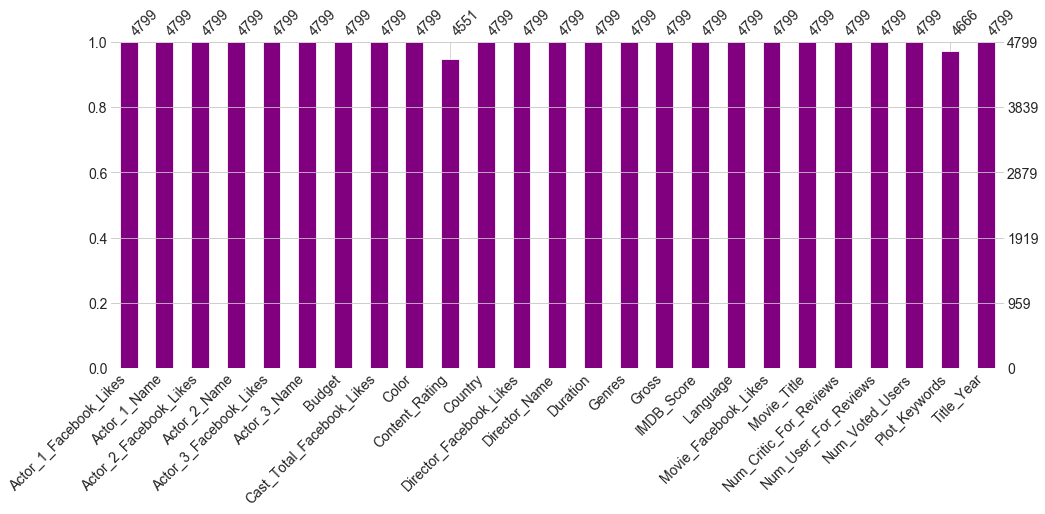

In [50]:
msno.bar(Data,  figsize=(16,6), fontsize=14, log=False, color="purple")

### 4. Saving CSV file

In [51]:
# Save as CSV
Data.to_csv('Data/clean_movie_metadata.csv', index=False)
# Save as MS Excel
Data.to_excel('Data/clean_movie_metadata.xlsx', index=False)